In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from numpy import polyfit 

[  1.61629371 -43.23076923]


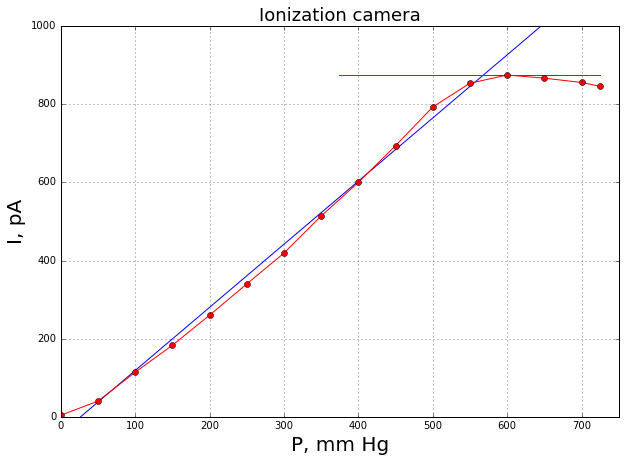

In [2]:
I = [846, 856, 867, 875, 854, 793,694,600,514,419,340,260,183,114,40,4]
P = list(np.arange(0,750,50))
P.append(725)
P = list(reversed(P))
P = np.array(P)

coef = polyfit(P[4:], I[4:], deg=1)
print(coef)

grid = np.linspace(np.min(P), np.max(P), 50)
vals = grid*coef[0] + coef[1]

P_0 = (np.max(I) - coef[1]) / coef[0]
plt.figure(figsize=(10,7))
plt.plot(grid, vals)
plt.plot([np.mean(P), np.max(P)], [np.max(I)]*2)
plt.xlabel("P, mm Hg",fontsize=20)
plt.ylabel("I, pA",fontsize=20)
plt.plot(P,I,'-o')
plt.title("Ionization camera",fontsize=18)
plt.ylim([0,1000])
plt.xlim([0,750])
plt.grid()
plt.show()

In [3]:
data = pd.DataFrame(np.array([P, I]).T)
data.columns = ["P, hg mm", "I, pA"]

In [4]:
data

,"P, hg mm","I, pA"
0,725,846
1,700,856
2,650,867
3,600,875
4,550,854
5,500,793
6,450,694
7,400,600
8,350,514
9,300,419


In [5]:
print("P_0 =", round(P_0),"[mm Hg]")

P_0 = 568.0 [mm Hg]


In [6]:
plut = 19.8
l = 5 #cm
R_e = l * P_0 / 760
R2 = R_e * plut
R2 #g/cm^2

74.003653674054462

In [7]:
print("R =", round(R_e,2), "[cm]")

R = 3.74 [cm]


In [8]:
E = (R_e / 0.32) ** (2 / 3)

In [9]:
print("E =", round(E,2), "[МэВ]")

E = 5.15 [МэВ]


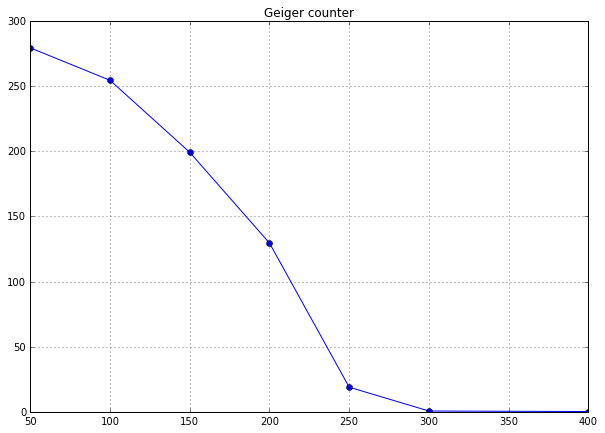

In [10]:
N = np.array([2, 6, 189, 1296, 1993, 2546, 2795])
T = np.array([10]*len(N))
P = 700 - np.array([300, 400, 450, 500, 550, 600, 650])
Y = N/T
plt.figure(figsize=(10, 7))
plt.plot(P,Y,'-o')
plt.title("Geiger counter")
plt.grid()
plt.show()

In [11]:
data_2 = pd.DataFrame(np.array([P, N, T, Y]).T)
data_2.columns = ["P, hg mm", "N", "T, sec", "Y, 1/sec"]

In [12]:
data_2

,"P, hg mm",N,"T, sec","Y, 1/sec"
0,400,2,10,0.2
1,300,6,10,0.6
2,250,189,10,18.9
3,200,1296,10,129.6
4,150,1993,10,199.3
5,100,2546,10,254.6
6,50,2795,10,279.5


In [13]:
P_0 = 300
L = 9

In [14]:
pol = 9.4
R_0 = L * P_0 / 760
R1 = pol * R_0
E = (R_0 / 0.32) ** (2 / 3)
print("R =",R_0,"см")
print("E =",E,"МэВ")
R1

R = 3.5526315789473686 см
E = 4.976608332432676 МэВ


33.39473684210527

In [15]:
ds = [10, 10.5, 11, 12, 13, 14, 15, 
     16, 17, 17.5, 18, 18.5, 19, 20, 22, 24]

Ns = [161, 752, 153, 149, 163, 175, 167, 149, 
     124, 477, 60, 256, 32, 31, 30, 19]

ts = [11.9, 50.4, 10.3, 10.2, 10.5, 10.3, 10.2, 10.2, 
     10.4, 50.5, 11, 90, 41.6, 55.5, 91.7, 91]

In [16]:
dn_dt = np.array(Ns) / np.array(ts)

In [17]:
data_3 = pd.DataFrame(np.array([ds, Ns, ts, dn_dt]).T)
data_3.columns = ["d, mm", "N", "t, sec", "dN/dT, 1/sec"]

In [18]:
data_3

,"d, mm",N,"t, sec","dN/dT, 1/sec"
0,10.0,161,11.9,13.529412
1,10.5,752,50.4,14.920635
2,11.0,153,10.3,14.854369
3,12.0,149,10.2,14.607843
4,13.0,163,10.5,15.523810
5,14.0,175,10.3,16.990291
6,15.0,167,10.2,16.372549
7,16.0,149,10.2,14.607843
8,17.0,124,10.4,11.923077
9,17.5,477,50.5,9.445545


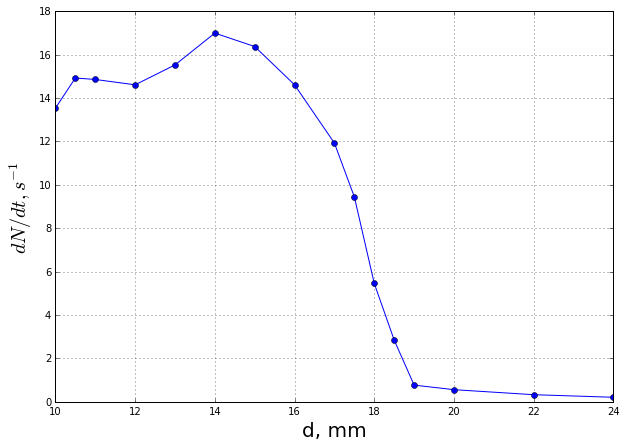

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(ds, dn_dt, "-o")
plt.grid()
plt.xlabel("d, mm",fontsize=20)
plt.ylabel(r"$dN / dt, s^{-1}$",fontsize=20)
plt.show()

In [23]:
R_e = 1.9 #cm
E = (R_e / 0.32) ** (2 / 3)
E

3.2789572040107253

In [26]:
T = 2.44 * 10**4 * 365 * 24 * 60 * 60
T

769478400000.0

In [28]:
Na = 6 * 10**23

In [29]:
ALL = 4 * np.pi / 0.04 / np.log(2) * T * 17
print(ALL / Na)

9.881400818778058e-09


In [30]:
np.mean([8,7,8,8,8,9])

8.0